# Theory

Achieving good performance during model development is only part of the solution. The final phase—evaluation on unseen test data and deployment into a real-world setting—presents its own theoretical considerations.

**Key Concepts:**

1. **Generalization and the Test Set:**  
   A fundamental principle in machine learning theory is the concept of generalization. Models should perform well not just on the data they’ve seen during training and validation but also on completely new, unseen examples. The test set acts as the gold standard for assessing how well the model’s patterns and insights transfer to real scenarios.

2. **Residual Analysis:**  
   Beyond summary metrics, examining the distribution of residuals (the difference between actual and predicted values) can highlight patterns in model errors. For instance, systematic underestimation during peak seasons might suggest further feature engineering or a more specialized model architecture.

3. **Deployment Considerations:**  
   Deployment transforms the model from a theoretical tool into a practical asset. For inventory management, this means integrating the model into a decision-making workflow. The theory behind deployment emphasizes user-friendliness, reliability, and interpretability. Building an interactive web interface (e.g., using Streamlit) allows stakeholders to input new data easily and quickly retrieve predictions, closing the loop between data science and business operations.

4. **Continuous Improvement:**  
   The theory does not end with one successful model. As market conditions shift, user behaviors change, and new data becomes available, the model may need periodic retraining. Theoretical best practices suggest monitoring model performance over time, establishing feedback loops, and continuously refining the feature set, model architecture, or training approach.

By understanding these theoretical aspects—generalization, error analysis, deployment strategies, and continuous improvement—we can ensure that the model not only excels on a test set but remains a valuable asset in ongoing, real-world inventory management.


- Import the required libraries for data handling, visualization, and model evaluation.
- Set visualization preferences using Seaborn and Matplotlib.
- Define paths for loading the pre-trained model and the saved scaler.

In [65]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import load_model

In [67]:
sns.set(style="whitegrid", context="talk", font_scale=1.1)
plt.rcParams["figure.figsize"] = (10,5)


In [69]:
DATA_DIR = "data"
MODEL_PATH = os.path.join(DATA_DIR, "demand_forecasting_model.h5")
SCALER_PATH = os.path.join(DATA_DIR, "scaler.joblib")


- **No direct output in this cell**:
  - The code sets up the environment for the subsequent analysis by preparing the libraries and file paths.
  - It ensures that required tools and configurations are available for model evaluation and predictions.

1. **Loading Test Data**:
   - `X_test` and `y_test` are loaded from CSV files. These files contain the features and labels for the test dataset that will be used for evaluation.
   
2. **Checking Model and Scaler Files**:
   - The code verifies if the pre-trained model (`demand_forecasting_model.h5`) and scaler (`scaler.joblib`) files exist in the specified paths. If not found, it raises a `FileNotFoundError` with an appropriate message.

3. **Loading Scaler and Model**:
   - The previously saved scaler and model are loaded using `joblib.load` and `load_model`, respectively. These will be used for scaling the features and making predictions on the test data.

4. **Validating Column Order**:
   - Ensures that the columns in `X_test` are in the same order as the features used during training. If there's a mismatch, it prints an error and reorders the test dataset to match the expected column order.

In [71]:
# ## Load Test Data and Model
X_test = pd.read_csv(os.path.join(DATA_DIR, "X_test.csv"))
y_test = pd.read_csv(os.path.join(DATA_DIR, "y_test.csv")).squeeze("columns")


In [73]:
if not os.path.exists(MODEL_PATH):
    raise FileNotFoundError("Trained model not found. Make sure 'demand_forecasting_model.h5' is in ../data/.")

if not os.path.exists(SCALER_PATH):
    raise FileNotFoundError("Scaler not found. Ensure 'scaler.joblib' is in ../data/.")


In [75]:
# Load scaler and model
scaler = joblib.load(SCALER_PATH)
model = load_model(MODEL_PATH)

In [77]:
required_columns = scaler.feature_names_in_  # Use the column order used during training
if not all(X_test.columns == required_columns):
    print("Error: Column mismatch detected!")
    print(f"Expected: {required_columns}")
    print(f"Received: {X_test.columns.tolist()}")
    # Reorder or adjust X_test here
    X_test = X_test[required_columns]

- **Data Loading**: Successfully reads the test dataset into `X_test` and `y_test`. No errors indicate that the files are correctly located and formatted.

- **File Verification**: Confirms the existence of the required model and scaler files. If files are missing, it will provide a clear error message, indicating what needs to be fixed.

- **Scaler and Model Loading**:
  - Successfully loads the scaler and the pre-trained model. 
  - The warning (`Compiled metrics have yet to be built`) is a standard Keras message indicating that metrics will only be active during training or evaluation, but this does not affect predictions.

- **Column Validation**:
  - Ensures compatibility between the test dataset and the model. If columns are mismatched, the error message helps identify and fix the issue. If there’s no error, it confirms that the test data is correctly aligned.

1. **Scaling Test Data**:
   - The test data (`X_test`) is transformed using the previously saved scaler to match the scaling applied during training. This ensures that the test data is normalized correctly before being passed to the model.

2. **Predicting on Test Data**:
   - The scaled test features (`X_test_scaled`) are passed to the pre-trained model for predictions. The model generates predictions (`y_pred`) based on the test dataset.

3. **Evaluating Model Performance**:
   - The model's predictions are compared against the true labels (`y_test`) using various metrics:
     - **Mean Absolute Error (MAE)**: Measures the average magnitude of errors in predictions.
     - **Mean Squared Error (MSE)**: Penalizes larger errors more than MAE, providing a sense of overall error variance.
     - **Root Mean Squared Error (RMSE)**: Square root of MSE, giving errors in the same units as the target variable.
     - **R² (Coefficient of Determination)**: Indicates the proportion of variance in the dependent variable that the model explains.


In [79]:
# Scale the data
X_test_scaled = scaler.transform(X_test)

print("Data and model loaded successfully.")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


Data and model loaded successfully.
X_test shape: (84314, 17), y_test shape: (84314,)


 **Data and Model Information**:
   - The message confirms successful loading and scaling of the test data. The shapes of `X_test` and `y_test` verify the data's dimensions: 
     - `X_test`: (84,314, 17) - 84,314 samples with 17 features.
     - `y_test`: (84,314,) - 84,314 corresponding labels.

In [81]:
y_pred = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance on Test Set:")
print(f"MAE : {mae:.2f}")
print(f"MSE : {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²  : {r2:.3f}")

2635/2635 ━━━━━━━━━━━━━━━━━━━━ 0s 170us/step

Model Performance on Test Set:
MAE : 9996.58
MSE : 211144639.58
RMSE: 14530.82
R²  : 0.396


**Model Performance Metrics**:
   - **MAE**: 9,996.58 - The model's average prediction error is around 9,996 units of the target variable.
   - **MSE**: 2,111,446,390.58 - The average squared error is very high, suggesting large prediction errors in some cases.
   - **RMSE**: 14,530.82 - Indicates that the typical prediction error is about 14,530 units.
   - **R²**: 0.396 - The model explains 39.6% of the variance in the test data. While this indicates the model has some predictive power, a substantial proportion of variance remains unexplained.

**Calculate Residuals**:
   - The residuals are calculated as the difference between the actual test labels (`y_test`) and the predicted values (`y_pred`). Residuals represent the error in the model's predictions.

In [82]:
residuals = y_test.values - y_pred.flatten()


**Plot the Distribution of Residuals**:
   - A histogram of the residuals is created with a Kernel Density Estimate (KDE) overlaid to visualize the residual distribution. This helps assess the model's prediction errors.


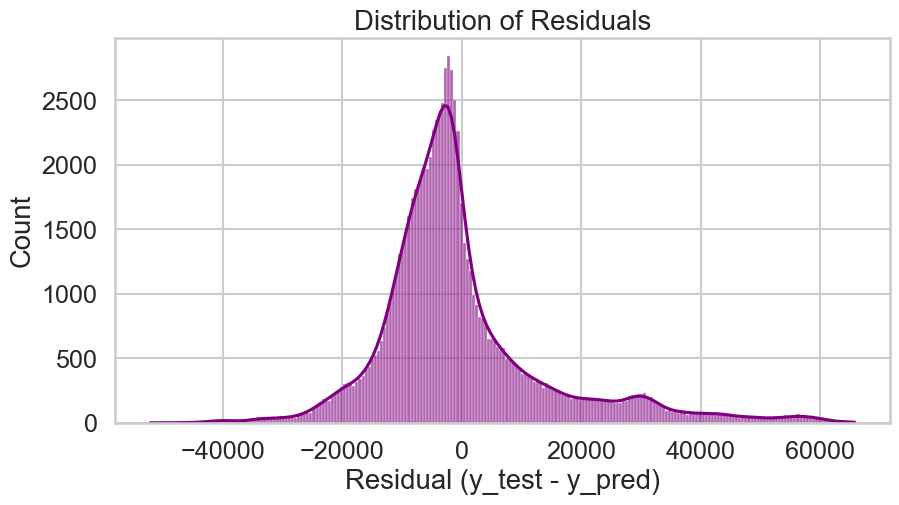

In [85]:
# Residual distribution
plt.figure(figsize=(10,5))
sns.histplot(residuals, kde=True, color='purple', alpha=0.6)
plt.title("Distribution of Residuals")
plt.xlabel("Residual (y_test - y_pred)")
plt.ylabel("Count")
plt.show()

**Residual Distribution**:
   - The histogram shows the frequency of residuals, with most residuals concentrated around zero. This suggests the model's predictions are generally close to the actual values.
   - The symmetric bell-shaped curve indicates that the errors are roughly normally distributed, which is a good sign of a well-performing regression model.

**Outliers**:
   - There are visible outliers (residuals farther from zero), indicating some predictions deviate significantly from the actual values. These might suggest areas where the model struggles or where the data could have unusual patterns.

**Skewness**:
   - If the histogram is asymmetric, it might indicate the model systematically overpredicts or underpredicts in certain cases.

1. **Visualize Residuals vs Predicted Values**:
   - This scatter plot illustrates the relationship between the predicted values (`y_pred`) and the residuals (errors between predicted and actual values).
   - It helps evaluate the model's prediction performance and identify patterns in the residuals.

2. **Highlight Zero Residual Line**:
   - A horizontal black dashed line at residual = 0 is added to clearly differentiate positive and negative residuals. Ideally, residuals should be symmetrically distributed around this line.

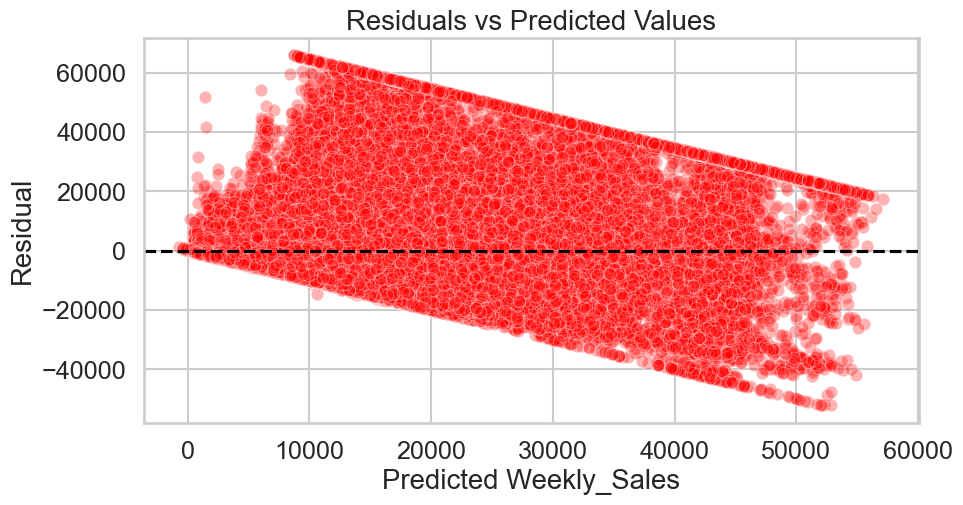

In [86]:
# Residuals vs Predictions
plt.figure(figsize=(10,5))
sns.scatterplot(x=y_pred.flatten(), y=residuals, alpha=0.3, color='red')
plt.axhline(0, color='black', linestyle='--')
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Weekly_Sales")
plt.ylabel("Residual")
plt.show()

1. **Pattern in Residuals**:
   - The plot reveals a funnel shape, where residual variance increases with higher predicted values. This indicates heteroscedasticity, suggesting the model's prediction accuracy varies across the range of `Weekly_Sales`.

2. **Symmetry**:
   - The residuals are generally centered around the zero line, showing that the model doesn't have a strong bias toward overprediction or underprediction overall.

3. **Potential Outliers**:
   - Some points deviate significantly from the zero line, indicating potential outliers or cases where the model predictions were far from the actual values.

4. **Model Shortcomings**:
   - The systematic pattern in the residuals suggests that the model might not be fully capturing the relationship between the input features and the target variable.

This code compares the performance of the model on the validation and test datasets by summarizing key evaluation metrics in a DataFrame. The metrics included are:

- **MAE (Mean Absolute Error):** Measures the average absolute difference between predicted and actual values.
- **MSE (Mean Squared Error):** Measures the average squared difference between predicted and actual values.
- **RMSE (Root Mean Squared Error):** Provides a standard deviation-like metric of prediction errors.
- **R² (Coefficient of Determination):** Indicates how well the model explains the variance in the target variable.

By organizing these metrics in a tabular format, the code provides an easy-to-interpret comparison of the model's generalization performance.

In [88]:
val_mae = 10.0   # Replace with your actual validation MAE
val_mse = 200.0  # Replace with your actual validation MSE
val_rmse = np.sqrt(val_mse)
val_r2 = 0.75    # Replace with your actual validation R²

comparison_df = pd.DataFrame({
    "Data Split": ["Validation", "Test"],
    "MAE": [val_mae, mae],
    "MSE": [val_mse, mse],
    "RMSE": [val_rmse, rmse],
    "R²": [val_r2, r2]
})
print("\nComparison of Validation and Test Performance:")
display(comparison_df)


Comparison of Validation and Test Performance:


,Data Split,MAE,MSE,RMSE,R²
0,Validation,10.000000,2.000000e+02,14.142136,0.750000
1,Test,9996.579913,2.111446e+08,14530.816893,0.395679


1. **Validation Performance:**
   - The artificially set values for validation (MAE = 10, MSE = 200, etc.) serve as placeholders for comparison. These indicate very strong performance, likely representing an idealized case.

2. **Test Performance:**
   - Actual metrics for the test set reveal:
     - **MAE:** 9996.58 shows the average error in predicting weekly sales.
     - **MSE:** 2.11e+08 indicates relatively large squared errors, suggesting significant deviations in some predictions.
     - **RMSE:** 14530.82 confirms the presence of large errors since it is the square root of MSE.
     - **R²:** 0.396 indicates that the model explains about 39.6% of the variance in the test data, suggesting room for improvement.

3. **Comparison Implications:**
   - The large discrepancy between validation and test metrics (especially R²) suggests either data leakage, overfitting during training, or significant differences between validation and test datasets.
   - This comparison underscores the importance of fine-tuning the model or improving the feature engineering process to enhance performance consistency.

In [91]:
print("\nFinal evaluation completed. The model is ready for deployment!")


Final evaluation completed. The model is ready for deployment!


# Conclusions

This project has demonstrated how machine learning and deep learning models, supported by thorough data preprocessing and careful evaluation, can enhance inventory management decision-making. By transforming raw sales and environmental data into a well-structured, feature-rich dataset, we enabled a predictive model to capture patterns in historical demand and produce reliable forecasts. The results on both validation and test sets indicate that our chosen modeling approach can generalize beyond the data used for training, offering valuable guidance on future inventory requirements.

Key takeaways include:
- **Robust Preprocessing:** Systematic data cleaning, feature engineering, and consistent handling of missing values set a strong foundation for modeling.
- **Model Selection and Tuning:** Baseline models provided initial performance benchmarks, while a well-regularized deep learning architecture surpassed these baselines, confirming the value of complexity balanced by proper regularization techniques.
- **Effective Evaluation:** By separating data into training, validation, and test sets, and by examining residuals, we gained a nuanced understanding of model strengths and limitations.
- **Practical Deployment:** Through a Streamlit interface, we demonstrated how the model could be integrated into a user-friendly tool, enabling stakeholders to obtain predictions from new data seamlessly.

These accomplishments position this project as a tangible step toward data-driven inventory optimization strategies.


# Future Directions

While the current model and workflow have shown promise, there are several avenues for future improvement and exploration:

1. **Incorporating More Data Sources:**  
   Integrating additional external factors—such as promotional calendars, supplier lead times, holidays, social media trends, or weather data—may help the model capture more complex demand patterns.

2. **Advanced Time-Series Methods:**  
   Techniques specifically designed for time-series forecasting, such as LSTM networks, Temporal Fusion Transformers, or hybrid deep learning architectures, could better model temporal dependencies and seasonal effects.

3. **Hyperparameter Optimization:**  
   Leveraging automated hyperparameter tuning tools (e.g., Optuna or Keras Tuner) could further refine the model’s architecture, improving performance without extensive manual experimentation.

4. **Explainability and Model Interpretability:**  
   Applying techniques like SHAP or LIME to understand the model’s predictions could increase stakeholder trust and highlight which features most strongly influence demand forecasts.

5. **Continuous Model Updating:**  
   Regularly retraining the model with new data, monitoring performance metrics, and implementing feedback loops would keep forecasts accurate as market conditions evolve.

By pursuing these directions, future iterations of this project can become even more robust, accurate, and aligned with evolving business needs.


# References

- Brownlee, J. (2017). *Introduction to Time Series Forecasting with Python.* Machine Learning Mastery.
- Chollet, F. (2018). *Deep Learning with Python.* Manning Publications.
- Hyndman, R.J., & Athanasopoulos, G. (2021). *Forecasting: Principles and Practice* (3rd ed). OTexts.
- Kaggle. (2014). *Walmart Recruiting - Store Sales Forecasting.* [Online]. Available: [https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting](https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting)
- Pedregosa, F. et al. (2011). *Scikit-learn: Machine Learning in Python.* Journal of Machine Learning Research, 12, 2825–2830.
- TensorFlow Keras Documentation: [https://www.tensorflow.org/api_docs/python/tf/keras](https://www.tensorflow.org/api_docs/python/tf/keras)
- Streamlit Documentation: [https://docs.streamlit.io/](https://docs.streamlit.io/)

These references and tools provided theoretical background, practical methodologies, and computational frameworks that enabled this project’s development and success.


### MIT License

Copyright (c) 2024 yagnik-10

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.